# **Global Super Store Data Analysis**

**Descriptive analysis on global Super Store Data**

Shopping online is currently the need of the hour. Because of this COVID, it's not easy to walk in a store randomly and buy anything you want. I this I am trying to understand a few things like

**Product Analysis**

* Which country has top sales?
* Which are the top 5 profit-making product types on a yearly basis
* How is the product price varying with sales - Is there any increase in sales * with the decrease in price at a day level
* What is the average delivery time across the counties - bar plot

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session


/kaggle/input/global-super-store-dataset/Global_Superstore2.csv

/kaggle/input/global-super-store-dataset/Global_Superstore2.xlsx

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df = pd.read_excel('/content/drive/MyDrive/Machine Learning/Global_Superstore2.xlsx')

In [5]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,32298,CA-2012-124891,31-07-2012,31-07-2012,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,...,TEC-AC-10003033,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650,7,0.0,762.1845,933.57,Critical
1,26341,IN-2013-77878,05-02-2013,07-02-2013,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,...,FUR-CH-10003950,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.63,Critical
2,25330,IN-2013-71249,17-10-2013,18-10-2013,First Class,CR-12730,Craig Reiter,Consumer,Brisbane,Queensland,...,TEC-PH-10004664,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.171,9,0.1,919.9710,915.49,Medium
3,13524,ES-2013-1579342,28-01-2013,30-01-2013,First Class,KM-16375,Katherine Murray,Home Office,Berlin,Berlin,...,TEC-PH-10004583,Technology,Phones,"Motorola Smart Phone, Cordless",2892.510,5,0.1,-96.5400,910.16,Medium
4,47221,SG-2013-4320,05-11-2013,06-11-2013,Same Day,RH-9495,Rick Hansen,Consumer,Dakar,Dakar,...,TEC-SHA-10000501,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.960,8,0.0,311.5200,903.04,Critical


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Row ID          51290 non-null  int64  
 1   Order ID        51290 non-null  object 
 2   Order Date      51290 non-null  object 
 3   Ship Date       51290 non-null  object 
 4   Ship Mode       51290 non-null  object 
 5   Customer ID     51290 non-null  object 
 6   Customer Name   51290 non-null  object 
 7   Segment         51290 non-null  object 
 8   City            51290 non-null  object 
 9   State           51290 non-null  object 
 10  Country         51290 non-null  object 
 11  Postal Code     9994 non-null   float64
 12  Market          51290 non-null  object 
 13  Region          51290 non-null  object 
 14  Product ID      51290 non-null  object 
 15  Category        51290 non-null  object 
 16  Sub-Category    51290 non-null  object 
 17  Product Name    51290 non-null 

#**Product Analysis**

#1. Plot the countries with their total sales - bar plot

Text(0.5, 0, 'Countries')

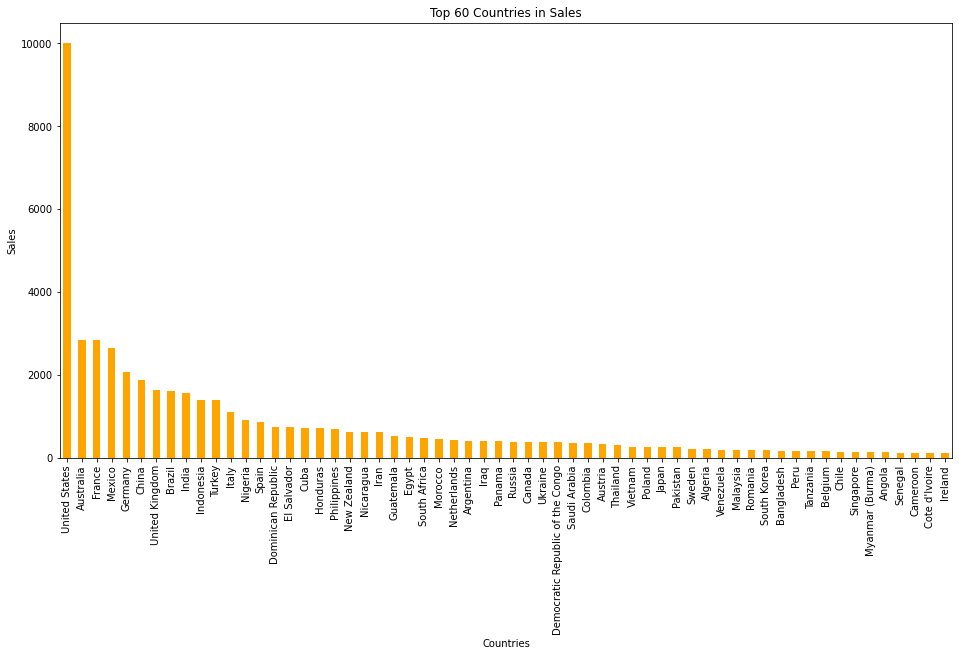

In [7]:
plt.figure(figsize=(16,8))
countries = df.groupby('Country')['Sales'].count().sort_values(ascending=False)
countries = countries [:60]
countries.plot(kind='bar', color='orange')
plt.title('Top 60 Countries in Sales')
plt.ylabel('Sales')
plt.xlabel('Countries')

#2. What are top 5 profit making product types on a yearly basis

In [8]:
products = df.groupby('Product Name')['Profit'].count().sort_values(ascending=False)
# top_5_products = products[:5]
# top_5_products
products.head()

Product Name
Staples                           227
Cardinal Index Tab, Clear          92
Eldon File Cart, Single Width      90
Rogers File Cart, Single Width     84
Ibico Index Tab, Clear             83
Name: Profit, dtype: int64

#3. What is the average delivery date across the countries - bar plot

In [9]:
df_x = df.drop_duplicates()

df_x['Order_to_Ship_Days'] = (pd.to_datetime(df_x['Ship Date']) 
                                           - pd.to_datetime(df_x['Order Date'])).dt.days

# # df_customer1.head()
#days_taken = df_x.groupby('Order ID')['Order_to_Ship_Days'].mean()
# total_days = days_taken.to_frame()
# total_days.head()

In [10]:
df_x.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,Order_to_Ship_Days
0,32298,CA-2012-124891,31-07-2012,31-07-2012,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,...,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650,7,0.0,762.1845,933.57,Critical,0
1,26341,IN-2013-77878,05-02-2013,07-02-2013,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,...,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.63,Critical,61
2,25330,IN-2013-71249,17-10-2013,18-10-2013,First Class,CR-12730,Craig Reiter,Consumer,Brisbane,Queensland,...,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.171,9,0.1,919.9710,915.49,Medium,1
3,13524,ES-2013-1579342,28-01-2013,30-01-2013,First Class,KM-16375,Katherine Murray,Home Office,Berlin,Berlin,...,Technology,Phones,"Motorola Smart Phone, Cordless",2892.510,5,0.1,-96.5400,910.16,Medium,2
4,47221,SG-2013-4320,05-11-2013,06-11-2013,Same Day,RH-9495,Rick Hansen,Consumer,Dakar,Dakar,...,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.960,8,0.0,311.5200,903.04,Critical,31


Text(0.5, 0, 'Countries')

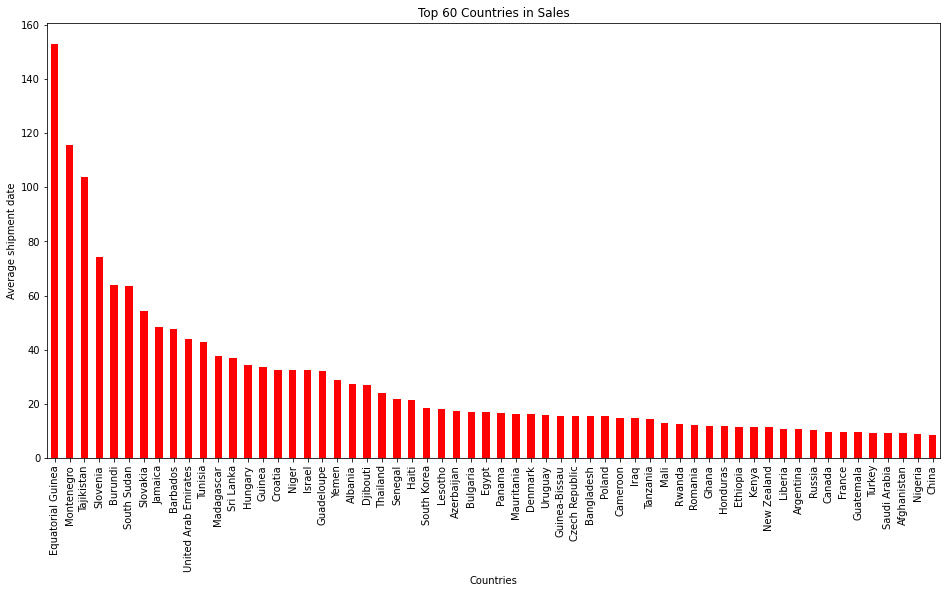

In [11]:
plt.figure(figsize=(16,8))
countries = df_x.groupby('Country')['Order_to_Ship_Days'].mean().sort_values(ascending=False)
countries = countries [:60]
countries.plot(kind='bar', color='red')
plt.title('Top 60 Countries in Sales')
plt.ylabel('Average shipment date')
plt.xlabel('Countries')